# 回帰(regression)

## 線形回帰

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


乱数を使ってデータを作成します．

In [2]:
# 同じ結果になるように乱数のシードを指定
np.random.seed(1)
# 乱数の数
N=100

X = 10*np.random.rand(N, 1)
y = 2 +  X + np.random.randn(N, 1)

散布図を作成します．

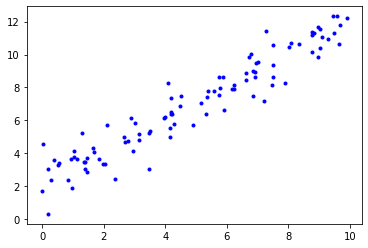

In [4]:
plt.plot(X, y, 'b.')
#save_fig('linear_regression_data')

scikit-learn で線形回帰させます．

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

得られた切片と傾きです．

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([2.23695725]), array([[0.96849251]]))

散布図に回帰直線を描画します．

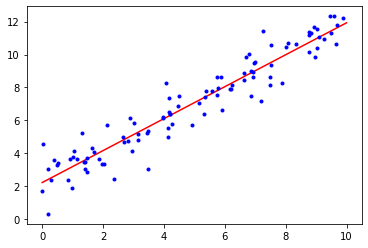

In [8]:
# 回帰直線
X_new = np.array([[0], [10]])
plt.plot(X_new, lin_reg.intercept_ + lin_reg.coef_ * X_new, 'r')

plt.plot(X, y, 'b.')
#save_fig('linear_regression_result')

性能を評価します．

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

print('MSE: {}'.format(mean_squared_error(y, lin_reg.predict(X))))
print('MAE: {}'.format(mean_absolute_error(y, lin_reg.predict(X))))
print('MedAE: {}'.format(median_absolute_error(y, lin_reg.predict(X))))

MSE: 0.7997618656011583
MAE: 0.6819138853655358
MedAE: 0.5725785756709694


## 多項式回帰

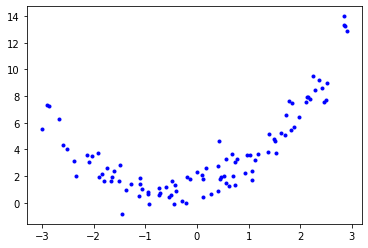

In [10]:
X = 6 * np.random.rand(N, 1) - 3
y = X**2 + X + 1 + np.random.randn(N, 1)
plt.plot(X, y, "b.")
#save_fig('poly_regression_data')

2次式を利用する準備です．

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

scikit-learn で2次式で回帰させます．

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

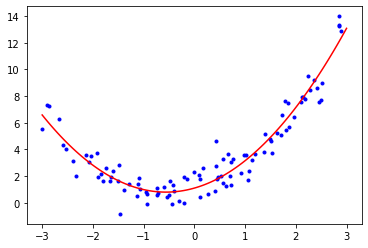

In [13]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r')
#save_fig('poly_regression_result')

In [14]:
print('MSE: {}'.format(mean_squared_error(y, lin_reg.predict(X_poly))))
print('MAE: {}'.format(mean_absolute_error(y, lin_reg.predict(X_poly))))
print('MedAE: {}'.format(median_absolute_error(y, lin_reg.predict(X_poly))))

MSE: 0.8396025240768297
MAE: 0.7289434457087299
MedAE: 0.6658611042219122


## 重回帰

一般にモデル構築と評価は以下となります．

1.  説明変数と目的変数の選択
1. 訓練データとテストデータの分割
1. 訓練データによる学習
1. テストデータによるテスト

scikit-learnのボストンの住宅価格データを使用します．

In [15]:
from sklearn.datasets import load_boston

boston = load_boston()

扱いやすいようDataFrame にする．

In [16]:
dataset = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
dataset['price'] = boston['target']
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


目的変数と説明変数を決めます．

In [17]:
Y = np.array(dataset['price'])
X = np.array(dataset[['CRIM', 'RM', 'AGE', 'DIS', 'RAD','TAX']])

データを訓練データとテストデータに分けます．

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

訓練データで学習します．

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

テストデータで予測してみます．

In [ ]:
Y_pred = lin_reg.predict(X_test)

真値と予測値を図示します．

In [ ]:
plt.scatter(Y_test, Y_pred)

Copyright. All rights reserved. Shuichi OHNO, 2020.